# Wine Data Clustering

## Section 1: k-Means Clustering

k-Means is a **partition-based clustering algorithm** that groups data points into a predefined number of **k clusters** based on similarity. Each cluster is represented by a **centroid**, and the goal is to minimize the distance between data points and their respective centroids.


### Step 1: Load the data

In [2]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
# Importing data and transforming using PCA
wine_data = pd.read_csv('./resources/winequality-red.csv')

# View the data
wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Step 2: Data Pre-processing

### 2.1 Check Summary Stats

In [4]:
# Check the summary stats
wine_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 2.2 Remove outliers

In [6]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers.index

# Detecting and removing outliers for all features except 'quality'
# Make a copy of the original data
wine_data_cleaned = wine_data.copy()
outlier_indices = []

for col in wine_data.columns:
    if col != 'quality':
        outliers = detect_outliers_iqr(wine_data, col)
        outlier_indices.extend(outliers)

# Remove outliers
wine_data_cleaned = wine_data_cleaned.drop(index=outlier_indices)

# Check the size of the original and cleaned data
original_size = wine_data.shape[0]
cleaned_size = wine_data_cleaned.shape[0]
removed = original_size - cleaned_size

print(f"Original data size: {original_size}")
print(f"Cleaned data size: {cleaned_size}")
print(f"Number of outliers removed: {removed}")


Original data size: 1599
Cleaned data size: 1194
Number of outliers removed: 405


### 2.2 Perform Scaling

In [7]:
# Import required libraries
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = wine_data_cleaned.drop(columns=['quality'])
y = wine_data_cleaned['quality']

# Scale the data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 2.3 Reduce Dimensions using PCA

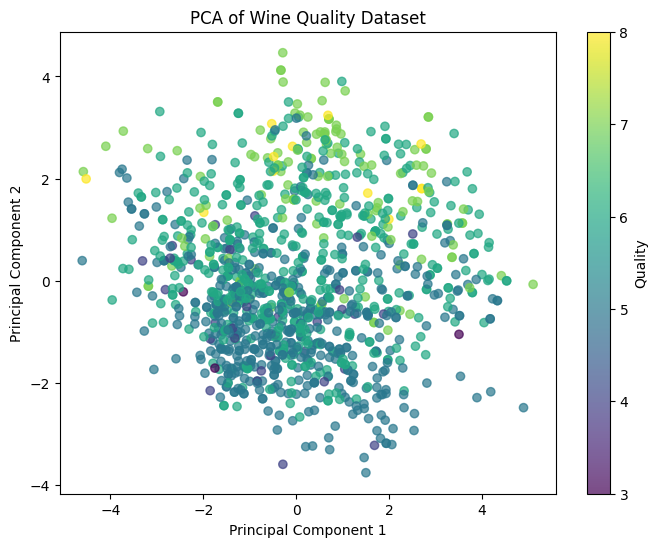

In [8]:
# Import required modules
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA-transformed data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("PCA of Wine Quality Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label='Quality')
plt.show()

### Step 3: Apply Clustering

c:\Users\sukri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


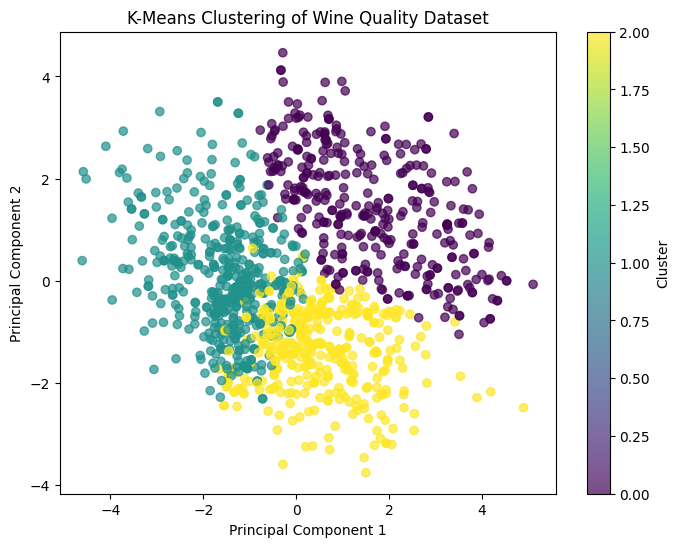

In [10]:
# k-means with some arbitrary k (number of clusters)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Plot the clustered data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title("K-Means Clustering of Wine Quality Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label='Cluster')
plt.show()


In [11]:
# Print k-means labels
print("K-Means Cluster Labels:")
print(labels)

K-Means Cluster Labels:
[1 2 2 ... 1 1 0]


### 3.1 Find the Optimal Number of Clusters
- Elbow Method
- Silhoutte Analysis


c:\Users\sukri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sukri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sukri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sukri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sukri\anaconda3\Lib\site-packages\sklearn\clust

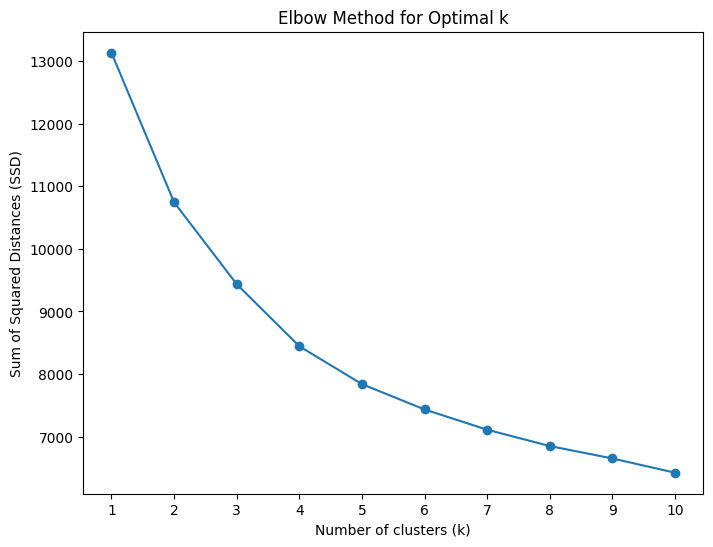

In [12]:
# Elbow-curve/SSD Method
# Using the Elbow Method to find the optimal number of clusters
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)


# Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squared Distances (SSD)")
plt.xticks(k_range)
plt.show()

c:\Users\sukri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=2: 0.18293041377419764
Silhouette Score for k=3: 0.15564828325871283


c:\Users\sukri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sukri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=4: 0.16413345305813776
Silhouette Score for k=5: 0.15985717000099828


c:\Users\sukri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sukri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=6: 0.15044049682316188
Silhouette Score for k=7: 0.1342463353772011


c:\Users\sukri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sukri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=8: 0.13152647263859477
Silhouette Score for k=9: 0.13168903119399963


c:\Users\sukri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sukri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=10: 0.13160937053537625


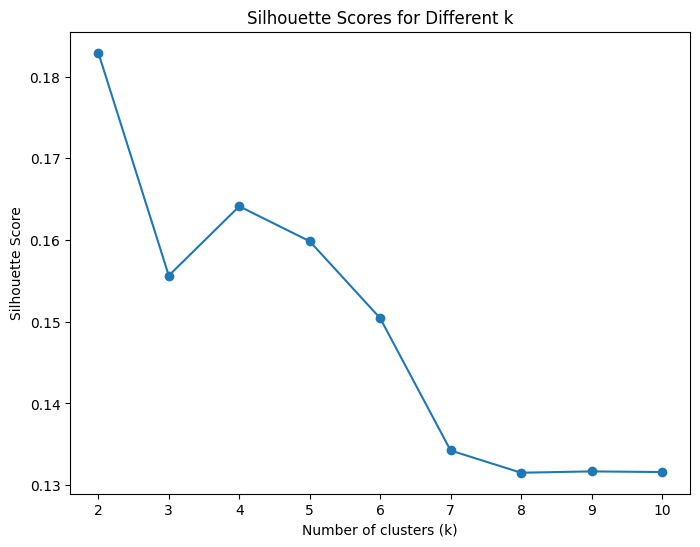

In [13]:
# silhouette analysis
# Initialize the range of clusters
from sklearn.metrics import silhouette_score

# For every cluster value, find silhoutte score
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    # Intialise kmeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_

    # Calculate & print silhouette score
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for k={k}: {silhouette_avg}")
# Plotting silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.show()

### 3.2 Build the final model with optimal 'k' value

In [ ]:
# Final model with k=3
final_kmeans = KMeans(n_clusters=3, random_state=42)
final_kmeans.fit(X_scaled)
final_labels = final_kmeans.labels_
print("Final K-Means Cluster Labels with k=3:")
print(final_labels)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Create a dataframe for the features with reduced dimensions - X_pca
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Add a column for storing the kmeans labels
df_pca['Cluster'] = final_labels

In [ ]:
# Checking a few values
print(df_pca.head())
print("Cluster Labels:")
print(final_labels)

In [ ]:
# Scatter plot of the two principal components to observe the cluster distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


## Section 2: Hierarchical Clustering


Hierarchical clustering is an **unsupervised learning algorithm** that builds a hierarchy of clusters, represented using a **dendrogram** (tree-like structure).


In [ ]:
# Import libraries


### Do hierarchical clustering via complete linkage

In [ ]:
# complete linkage
# Generate the hierarchical clustering linkage matrix using 'complete' linkage method



# Plot the dendrogram to visualize the hierarchical clustering



# Display the plot



In [ ]:
# Create complete linkage cluster labels choosing number of clusters to be 3


### Plot the hierarchical clustering graph

In [ ]:
# Create a dataframe for features with reduced dimensions using pca

# Add a column to store the hierarchical clustering labels


# Plot the clusters


## Section 3: Density based Clustering


Density-based clustering identifies clusters as dense regions of data points separated by areas of low density. It works well with arbitrary-shaped clusters and can detect outliers effectively.


In [ ]:
# Import libraries


In [ ]:
# DBSCAN model
# Initialize the DBSCAN clustering model with eps = 0.5, min_samples=4

# Fit the model


In [ ]:
# Print DBSCAN labels
# Noisy samples are given the label -1


In [ ]:
# Print silhouette score


In [ ]:
# Create a dataframe for features with reduced dimensions

# Add a column to store the dbscan labels


# scatter plot using the first two principal components to observe the cluster distribution
